In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [303]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [220]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [221]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Removing missing values

In [304]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### First, let's remove variables with most of the values missing

In [347]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [348]:
df = pd.concat([X , test_data])
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], axis=1)

In [307]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [349]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [281]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [282]:
df.MSZoning[df["Neighborhood"] == "IDOTRR"]

21           RM
30      C (all)
52           RM
61           RM
88      C (all)
         ...   
1429         RM
1430         RM
1431    C (all)
1432    C (all)
1433    C (all)
Name: MSZoning, Length: 93, dtype: object

In [283]:
df.groupby('MSSubClass')['LotFrontage'].apply(lambda x: x.isnull().sum()).to_dict()

{20: 185,
 30: 13,
 40: 1,
 45: 0,
 50: 25,
 60: 133,
 70: 11,
 75: 2,
 80: 33,
 85: 16,
 90: 17,
 120: 32,
 150: 1,
 160: 12,
 180: 1,
 190: 4}

In [350]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [351]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [233]:
# df['Electrical'] = df["Electrical"].fillna(df.Electrical.mode())

In [311]:
categorical_columns = df.select_dtypes(exclude=['int64','float64']).columns

In [312]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [352]:
df[categorical_columns] = df[categorical_columns].transform(lambda x: x.fillna(x.mode()[0]))   
df = df.fillna(0)

In [314]:
# numeric_missed = ['BsmtFinSF1',
#                   'BsmtFinSF2',
#                   'BsmtUnfSF',
#                   'TotalBsmtSF',
#                   'BsmtFullBath',
#                   'BsmtHalfBath',
#                   'GarageYrBlt',
#                   'GarageArea',
#                   'GarageCars',
#                   'MasVnrArea']
# for feature in numeric_missed:
#     df[feature] = df[feature].fillna(0)

In [353]:
# df = df.transform(lambda x: x.fillna(x.mean()[0]))   

## Fix skewness

<AxesSubplot:>

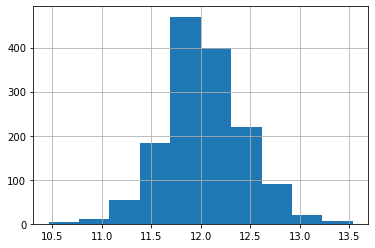

In [354]:
# y = np.log1p(y)
# y.hist()

In [131]:
# from scipy.stats import norm, skew

In [355]:
# numeric_feats = df.dtypes[df.dtypes != 'object'].index
# skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
# high_skew = skewed_feats[abs(skewed_feats) > 0.5]
# high_skew.head(50)

GarageCars       53.935542
BsmtHalfBath     38.161761
BsmtFullBath     38.153322
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.185496
EnclosedPorch     4.003891
ScreenPorch       3.946694
MasVnrArea        3.322873
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.423105
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.161292
BsmtUnfSF         0.918362
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
OverallCond       0.570312
YearBuilt        -0.599806
GarageYrBlt      -3.650309
dtype: float64

In [356]:
# for feature in high_skew.index:
#     df[feature] = np.log1p(df[feature])

## Adding categorical columns

In [357]:
df = pd.get_dummies(df)


In [ ]:
# corr = train_data.corr()

In [15]:
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'corr' is not defined

In [358]:
train = df[:len(train_data)]
test = df[len(train_data):]

In [360]:
print(train.shape, test.shape, train_data.shape)

(1460, 271) (1459, 271) (1460, 81)


In [361]:
X = train

In [362]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## Training

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [364]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,893,3.044522,4.262680,9.037771,6,2.197225,7.582738,2003,0.000000,6.498282,...,0,0,0,1,0,0,0,0,1,0
1105,1106,4.110874,4.595120,9.413852,8,1.791759,7.598399,1995,5.894403,6.940222,...,0,0,0,1,0,0,0,0,1,0
413,414,3.433987,4.043051,9.100637,5,1.945910,7.564238,1950,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
522,523,3.931826,3.931826,8.517393,6,2.079442,7.574558,1950,0.000000,5.991465,...,0,0,0,1,0,0,0,0,1,0
1036,1037,3.044522,4.499810,9.464905,9,1.791759,7.604894,2008,4.262680,6.930495,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1011,3.931826,4.753590,9.965852,5,1.791759,7.575072,1950,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
390,391,3.931826,3.931826,9.036701,5,2.197225,7.550135,1950,0.000000,5.488938,...,0,0,0,1,0,0,0,0,1,0
1409,1410,4.110874,3.850148,9.930373,7,1.945910,7.594381,1991,4.820282,0.000000,...,0,0,0,1,0,0,0,0,1,0
847,848,3.044522,3.610918,9.650142,5,1.945910,7.587311,1972,0.000000,6.133398,...,0,0,0,1,0,0,0,0,1,0


In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [365]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)


### Choosing the best parametres 

In [26]:
reg_rf = RandomForestRegressor()

In [27]:
parametrs = {'n_estimators': [10,15, 22, 24, 26], 'max_depth' : [7, 10, 13, 15], 
             'min_samples_leaf': range(1, 5)}

In [28]:
grid_search_cv_reg = GridSearchCV(reg_rf, parametrs, cv=5)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763.0,0.0,...,0,0,0,1,1,0,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1304,20,73.0,8688,7,5,2005,2005,228.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836.0,0.0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1131,50,65.0,7804,4,3,1928,1950,0.0,622.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1295,20,60.0,8172,5,7,1955,1990,0.0,167.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [106]:
y_train

Id
616     11.831386
614     11.898195
1304    12.354497
487     11.957618
562     12.043560
          ...    
1096    12.080696
1131    11.813037
1295    11.652696
861     12.154521
1127    12.066816
Name: SalePrice, Length: 978, dtype: float64

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13, 15],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [10, 15, 22, 24, 26]})

In [91]:
grid_search_cv_clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 26}

In [32]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.006224066390041493

In [34]:
predict = best_clf.predict(X_test)

In [35]:
predict.shape

(482,)

### Calculate error

In [36]:
from sklearn.metrics import mean_squared_log_error


In [333]:
np.expm1(prediction)

array([138405.80095912, 320173.9444338 , 115959.00262958, 148894.65394112,
       305486.86111991,  81651.20807597, 208696.31232981, 150876.00027458,
        80498.32939055, 123118.0476211 , 166896.05274718, 119409.75541572,
       104401.34985422, 209039.21517679, 177844.1261156 , 127428.57122672,
       191278.95786384, 135244.55091827, 114615.44449724, 210555.29612191,
       171752.21032987, 223659.94105583, 174325.78273919, 122941.89263885,
       197356.57477477, 165632.4217141 , 179718.88822531, 101702.07205091,
       178146.95688357, 198092.85586961, 126429.28341588, 250410.67679378,
       167153.02998468, 111827.09154982, 254551.01551594, 148265.80067311,
       135748.87311322, 207268.62381629, 309394.84432446, 107994.79945016,
       124101.99693578, 231244.7027839 , 119072.84081621, 343085.25451686,
       139888.77780195, 129719.34654831, 118276.71260193, 128420.02888938,
       385330.76251161, 137774.87244676, 119937.28389156, 188847.9040185 ,
       115374.28283377, 3

In [334]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [367]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction)))

0.14581529089352552

In [368]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [369]:
y_pred = rf.predict(test)

In [370]:
y_pred

array([11.74746387, 11.91492854, 12.12605986, ..., 11.98875208,
       11.66374551, 12.35324582])

In [371]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [372]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [373]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [374]:
tmp['SalePrice'] = np.expm1(y_pred)

In [375]:
y_pred.shape

(1459,)

In [376]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [377]:
pred_df

,SalePrice
Id,
1461,126431.502757
1462,149480.593376
1463,184619.909457
1464,183764.856415
1465,199103.549177
...,...
2915,85053.101925
2916,88733.657882
2917,160933.395638


In [378]:
pred_df.to_csv('out.csv')

In [126]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64